# Final Project:  Implement Prim's Algorithm

In this project, you will implement Prim's algorithm for finding a minimal-weight spanning tree for a weighted graph. This notebook will walk you through building the necessary functions.  

#### Due Date
The entire project will be due **Wednesday, May 6th at 11:59PM**.

And now **on to the project!**

In [35]:
# this block imports packages needed by the Graph and Weighted_Graph classes.  
# Just run it.
import numpy as np
import random
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from Graph import Graph
from Weighted_Graph import Weighted_Graph


### The `Graph` and `Weighted_Graph` classes
The files `Graph.py` and `Weighted_Graph.py` contain the classes `Graph` and `Weighted_Graph` classes. You should open them in Spyder (or the editor of your choice) and familiarize yourself with the variables and methods (you do not need to understand all of the code, just what input and output the methods are).

An instance of the `Graph` class is created by the command `Graph(<file>)` where `<file>` is the name of a file containing the edges and vertices for a specific graph.  The key variables and methods are.
- ***Variables***
    - **`edge_set`**: the edge set of the graph
    - **`vertex_set`**: the vertex set of the graph
- ***Methods***
    - **`add_edge(e)`**: adds edge e to the edge set and its endoints to the vertex set.
    - **`spans(H)`**: checks if H is a spanning subgraph
    - **`draw_graph()`**: draws the graph
    - **`draw_subgraph(H)`**: draws the graph with the subgraph H highlighted
    
An instance of the `Weighted_Graph` class is created by the command `Weighted_Graph(<file>)` where `<file>` is the name of a file containing the edges, vertices, and weights for a specific weighted graph. All of the variables and methods for the `Graph` class are usable by a `Weighted_Graph` object.  There is one new variable
- **`edge_dict`** : A dictionary assigning weights to edges (the keys are edges and the values are weights



Vertex Set: {0, 1, 2, 3, 4, 5}
Edge Set: {(0, 1), (4, 5), (1, 5), (2, 3), (2, 4), (3, 4), (0, 2), (3, 5)}


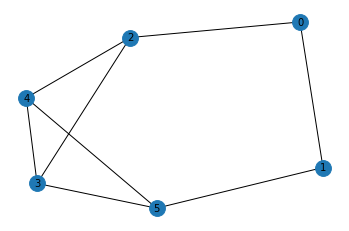

In [3]:
#There are two ways to create an instance of a Graph object
#1. From a file.
G = Graph('test1.txt')
print("Vertex Set:",G.vertex_set)
print("Edge Set:",G.edge_set)
G.draw_graph()

Vertex Set: {'B', 'A', 'D', 'C'}
Edge Set: {('C', 'D'), ('A', 'C'), ('B', 'C'), ('D', 'A'), ('A', 'B')}


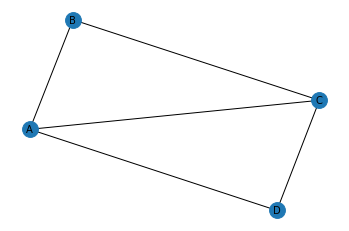

In [4]:
#2. By defining the vertex and edge sets

V = {'A','B','C','D'}
E = {('A','B'), ('B','C'),('C','D'),('D','A'),('A','C')}
G = Graph(V,E)
print("Vertex Set:",G.vertex_set)
print("Edge Set:",G.edge_set)
G.draw_graph()

### Prim's Algorithm

Recall that Prim's Algorithm for finding a MST (minimal-wieght spanning tree) $T=(V_T,E_T)$ of a weighted graph $G=(V,E)$ works as follows.
- **Step 0**: Pick a random vertex $v$ and initialize $T=(\{v\},\{\})$
- **Step 1**: Find the edge $e$ with smallest weight such that $T+e$ is a tree.
- **Step 2**: Update $T=T+e$
- **Step 3**: Repeat steps 1 and 2 until $T$ spans $G$

**Step 1** actually requires 3 substeps
1. **Find incident edges**: Find all edges of $G$ that are incident with $T$.
2. **Find all valid edges**: From the incident edges, find all edges $e$ such that $T+e$ is a tree
3. **Find the valid edge with minimum weight**

You will first define functions to perform the substeps of step 1. After defining these functions, will write a function to implement Prims algorithm. Finally, you will test your functions on two graphs.

### Finding incident edges.
**Problem 1**: Write a function `incident_edges` that finds all edges from a graph $G$ that are incident with a subgraph $T$

In [18]:

def incident_edges(G,T):
    ''' return the set of all edges from graph G that are incident with tree T'''
    
    # initialize an empty set incidentEdges 
    ...
    incidentEdges = set()
    
    # for every vertex v in T check all edges e in G.  
    # if v is an endpoint of e, add e to incidentEdges
    ...
    
    for e in G.edge_set:
        for v in G.vertex_set:
            if v in e:
                incidentEdges.add(e)
    
    # return indicent edges that are not already edges in T 
    ...
    edgesNotinT = set()
    for i in incidentEdges:
        if i not in T.edge_set:
            edgesNotinT.add(i)
    return edgesNotinT
    

Test `incident_edges` using `test1.txt` and `test1sub.txt`. If your function is correct, you should see
`{(2, 4), (3, 4), (3, 5), (4, 5)}`

In [19]:
G = Weighted_Graph('test1.txt')
T = Graph('test1sub.txt')
incident_edges(G,T)

{(2, 4), (3, 4), (3, 5), (4, 5)}

### Finding valid edges.
**Problem 2**: Write a function `valid edges` that takes a Graph $G$ and a subgraph $T$, and returns all edges $e$ in $G$ where $T+e$ is a tree. (Hint: first find all edges incident with $T$ and then find the ones that can be added to $T$ to make a tree).

In [24]:
def valid_edges(G,T):
    ''' return the set of all edges e from G where T+e is a tree and e is not already an edge of T'''

    # get a set incident of all edges in G incident with T
    ...
    incident = incident_edges(G,T)
    
    
    # initialize an empty set valid 
    ...
    valid = set()
    # check all edges e in incident.  if T+e is a tree, add e to valid
    # Hint: T+e is a tree if one of its endpoints is not already in the vertex set of T
    ...
    for e in incident:
        if e[0] not in T.vertex_set or e[1] not in T.vertex_set:
            valid.add(e)
    
    # return all of the valid edges   
    ...
    return valid


Test `valid_edges` using `test1.txt` and `test1sub.txt`. If your function is correct, you should see
`{(2, 4), (3, 4), (4, 5)}`

In [25]:
G = Weighted_Graph('test1.txt')
T = Graph('test1sub.txt')
valid_edges(G,T)

{(2, 4), (3, 4), (4, 5)}

### Finding the minimum valid edge
We now need to find the valid edge with the smallest weight.  It may make your code more readable to create a function `weight` that takes a graph $G$ and an edge $e$ and returns the weight of the edge. 

**Problem 3**: Complete the function `weight` below.

In [36]:
def weight(e,G):
    ''' return the weight of an edge in a weighted graph G '''
    ...
    return G.edge_dict[e]
        
    
#   Weighted_Graph
#   edge_dict

**Problem 4**:  Now write a function that takes a graph $G$ and a subgraph $T$, checks all valid edges (the edges that can be added to T to produce a tree) and returns the one with the minimum weight.

In [43]:
def min_valid_edge(G,T):
    ''' return the edge e from graph G with minimum weight where T+e is a tree '''
 
    # get a set all edges e in G where T+e is a tree
    ...
    allValidEdges = valid_edges(G,T)
    
    # initialize min_edge to be a random edge in valid 
    ...
    min_edge = random.choice(tuple(allValidEdges))
   
    # check all valid edges e.  if the weight of e is less than the weight of min_edge, update minEdge = e 
    ...
    for e in allValidEdges:
        if weight(e,G) < weight(min_edge, G):
            min_edge = e
   
    # return min_edge
    ...
    return min_edge



Test `min_valid_edge` using `test1.txt` and `test1sub.txt`. If your function is correct, you should see
`(3, 4)`

In [58]:
G = Weighted_Graph('test1.txt')
T = Graph('test1sub.txt')
min_valid_edge(G,T)

(3, 4)

### Prim's algorithm

**Problem 5**:  Finally, write a function that takes as input a graph $G$ and executes Prim's algorithm to find a minimum-weight spanning tree.  

In [59]:
def prim(G):
    ''' Use Prim's algorithm to find a MST for the graph G '''    

    # Initialize tree T with a single vertex and no edges 
    v = next(iter(V))
    ...
    T = ({𝑣},{})
    
    while T.vertex_set < G.vertex_set:
        e = min_valid_edge(G,T)
    
    # while the vertex set of T is smaller than the vertex set of G, 
    # (i.e. while the vertex set of T is a proper subset of the 
    #  vertex set of G), find the edge e with minimum weight so that  
    # T+e is a tree. Then update T = T+e '''
    ...
    T = ({𝑣},{e})

    # return T 
    ...
    return T

### Use Prim's Algorithm
**Problem 6**: Yay! You've implemented Prim's algorithm!  Now use it to find a minimal-weight spanning tree for the graph in the file `test1.txt`.  Use the method `draw_subgraph` to draw the graph with it's minimal-weight spanning tree.

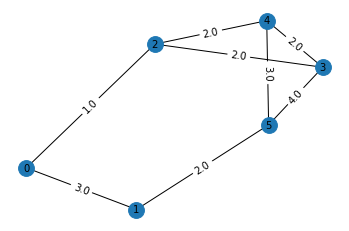

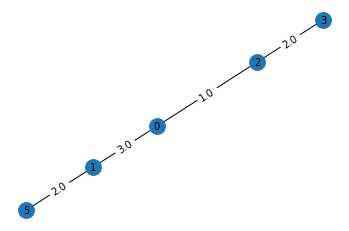

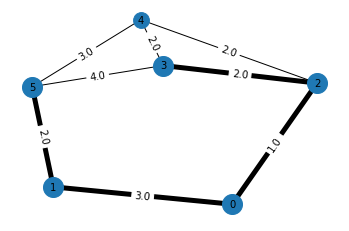

In [61]:
W = Weighted_Graph('test1.txt')
H = Weighted_Graph('test1sub.txt')
W.draw_graph()
H.draw_graph()
W.draw_subgraph(H)

**Problem 7**: Repeat the previous exercise using the graph in the file `test2.txt`

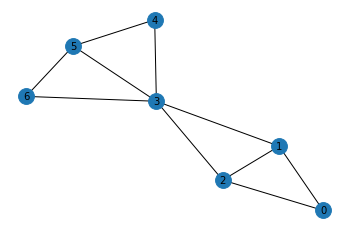

In [62]:
G = Graph('test2.txt')

G.draw_graph()